<a href="https://colab.research.google.com/github/rameshthangam/CNN/blob/main/Classification_Object_Detection_TF_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Tensorflow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns

print(tf.__version__)

2.17.0


In [ ]:
# Import the dataaset
dog_cat_dataset = tf.keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = dog_cat_dataset.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step


In [ ]:
train_images.shape

(50000, 32, 32, 3)

In [ ]:
test_images.shape

(10000, 32, 32, 3)

In [ ]:
train_labels

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
test_labels

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [ ]:
len(test_labels)

10000

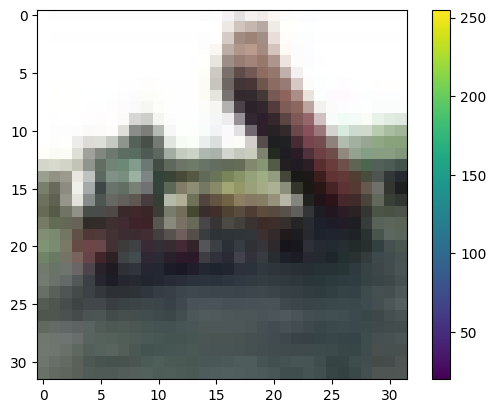

In [ ]:
plt.figure()
plt.imshow(train_images[2])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
# scale the values to a range 0 to 1
train_images = train_images / 255.0
test_images = test_images / 255.0


In [ ]:
#Add the class names into a list
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

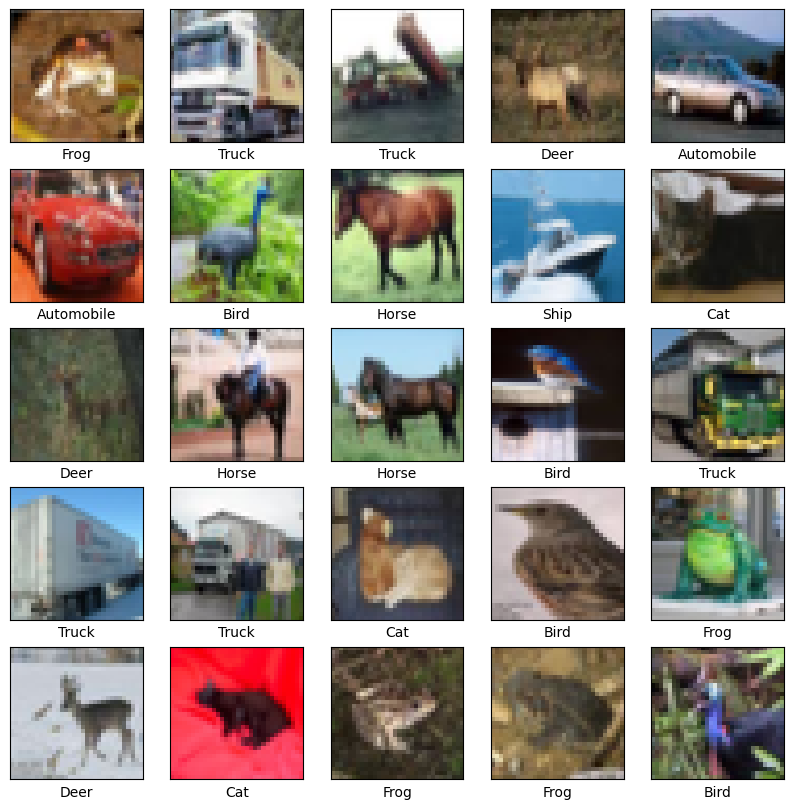

In [ ]:
#Display the 25 images in the dataset to make sure the class names are rightly mapped
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [ ]:
# Build the Model
## setup the layers
# model = keras.Sequential([
#     keras.layers.Flatten(input_shape=(32, 32, 3)),



#     keras.layers.Dense(128, activation='relu'),
#     keras.layers.Dropout(0.2),
#     keras.layers.Dense(64, activation='relu'),
#     keras.layers.Dense(10, activation='softmax')
# ])

model = keras.Sequential([
    keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.BatchNormalization(), #Add BatchNormalization() layers after Conv2D or dense layers to stabilize and speed up training by normalizing the inputs to these layers.
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    keras.layers.BatchNormalization(), #Add BatchNormalization() layers after Conv2D or dense layers to stabilize and speed up training by normalizing the inputs to these layers.
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.3),

    keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    keras.layers.BatchNormalization(), #Add BatchNormalization() layers after Conv2D or dense layers to stabilize and speed up training by normalizing the inputs to these layers.
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.4),

    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.5),
    # keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    keras.layers.Dense(10, activation='softmax'),
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=10000,
    decay_rate=0.9)

In [ ]:
## compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=lr_schedule),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              # loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# checkpoint = tf.keras.callbacks.ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')


In [ ]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Assuming `train_images` is your training image data
datagen.fit(train_images)

In [ ]:
## Train the model
history = model.fit(train_images, train_labels, epochs=30, validation_data=(test_images, test_labels), callbacks=[early_stopping])

# To print the final training accuracy
train_accuracy = history.history['accuracy'][-1]
print(f"Final Training Accuracy: {train_accuracy * 100:.2f}%")

# To print the final validation accuracy
val_accuracy = history.history['val_accuracy'][-1]
print(f"Final Validation Accuracy: {val_accuracy * 100:.2f}%")


Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7343 - loss: 1.0091 - val_accuracy: 0.7372 - val_loss: 1.0296
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7430 - loss: 0.9828 - val_accuracy: 0.6498 - val_loss: 1.3049
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7406 - loss: 0.9790 - val_accuracy: 0.7641 - val_loss: 0.9190
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7494 - loss: 0.9506 - val_accuracy: 0.6625 - val_loss: 1.2547
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7546 - loss: 0.9423 - val_accuracy: 0.7477 - val_loss: 0.9651
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7526 - loss: 0.9313 - val_accuracy: 0.7772 - val_loss: 0.8801
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7600 - loss: 0.9182 - val_accuracy: 0.7226 - val_loss: 1.0278
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7595 - loss: 0.908

In [ ]:
# plot_auc_curve(model, test_images, test_labels)
# print_accuracy_metrics(y_test,y_pred)

In [ ]:
# Evaluate accuracy
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.8041 - loss: 0.7330

Test accuracy: 0.804099977016449


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


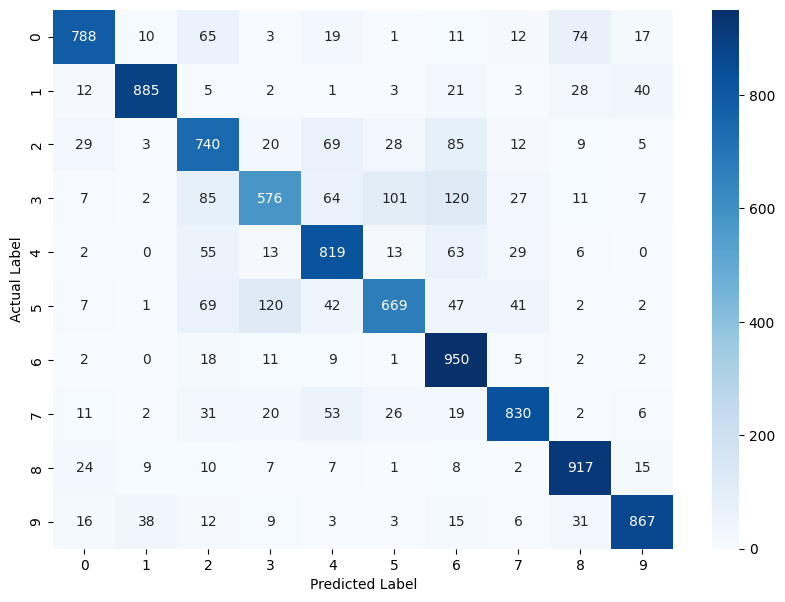

In [ ]:
# Get predictions from the model
predictions = model.predict(test_images)

# Convert predictions to class labels (using argmax to get the index of the highest probability)
predicted_labels = np.argmax(predictions, axis=1)

# Convert true labels to integers if they are categorical
# true_labels = np.argmax(test_labels, axis=1)
true_labels = test_labels

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()